In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import f1_score

In [71]:
data = pd.read_csv('diabetes.csv')
data
# 1 means person has diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# data preprocessing

In [72]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:xlabel='Outcome', ylabel='count'>

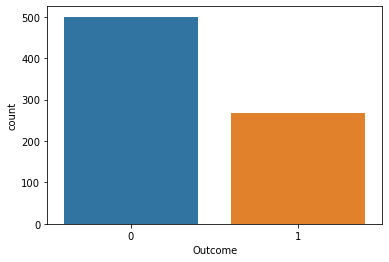

In [73]:
sns.countplot(x = 'Outcome',data=data)

In [74]:
pd.value_counts(data['Outcome'])

0    500
1    268
Name: Outcome, dtype: int64

In [75]:
data.groupby('Insulin')['Outcome'].sum().reset_index()

,Insulin,Outcome
0,0,138
1,14,1
2,15,0
3,16,0
4,18,0
...,...,...
181,579,1
182,600,1
183,680,0
184,744,0


In [76]:
# checking variance

variables = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
# variables
vif['features'] = variables.columns

In [77]:
vif

,VIF,features
0,3.275748,Pregnancies
1,16.725078,Glucose
2,14.619512,BloodPressure
3,4.008696,SkinThickness
4,2.063689,Insulin
5,18.408884,BMI
6,3.195626,DiabetesPedigreeFunction
7,13.492985,Age


In [78]:
data = data.drop(['Glucose','BloodPressure','BMI','Age'], axis=1)

In [79]:
data['Pregnancies'].max()

17

# outlier
- > finding outliers in all features that are selected for trainging purpose

In [179]:
# pregrnancy outlier
sns.boxplot(x = data['Pregnancies'])

KeyError: 'Pregnancies'

In [85]:
# outlier removing the mean value of pregnancy
outliers_removed = [x for x in data['Pregnancies'] if x >= 12.5 and x <= 17.5]
for i in data['Pregnancies']:
  if i in set(outliers_removed):
    data['Pregnancies'] = data['Pregnancies'].replace(i,data['Pregnancies'].mean())     

In [180]:
# outlier in skinthickness
sns.boxplot(x=data['SkinThickness'])

KeyError: 'SkinThickness'

In [91]:
# outlier removing with mean value of skinthickness
outlier_removed = [x for x in data['SkinThickness'] if x>=60 and x<=100]
for i in data['SkinThickness']:
    if i in outlier_removed:
        data['SkinThickness'] = data['SkinThickness'].replace(i, data['SkinThickness'].mean())

<AxesSubplot:xlabel='Insulin'>

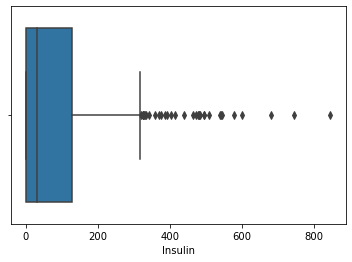

In [92]:
# outlier for insulin
sns.boxplot(x = data['Insulin'])

In [93]:
# outlier removing from insuling and replacing with mean value of insulin
outlier_removed = [x for x in data['Insulin'] if x>=250 and x<=850]
for i in data['Insulin']:
    if i in outlier_removed:
        data['Insulin'] = data['Insulin'].replace(i, data['Insulin'].mean())

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

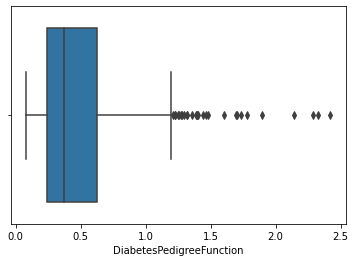

In [94]:
# outlier in DiabetesPedigreeFunction
# DiabetesPedigreeFunction: Its about type-1 diabetes which comes form genes

sns.boxplot(x = data['DiabetesPedigreeFunction'])

In [96]:
# outlier removing from DiabetesPedigreeFunction and replacing with the mean value of it
outlier_removed = [x for x in data['DiabetesPedigreeFunction'] if x>=1.2 and x<=2.5]
for i in data['DiabetesPedigreeFunction']:
    if i in outlier_removed:
        data['DiabetesPedigreeFunction']= data['DiabetesPedigreeFunction'].replace(i, data['DiabetesPedigreeFunction'].mean())

In [97]:
# updated data without outlier
data

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6.0,35.0,0.0,0.627000,1
1,1.0,29.0,0.0,0.351000,0
2,8.0,0.0,0.0,0.672000,1
3,1.0,23.0,94.0,0.167000,0
4,0.0,35.0,168.0,0.471876,1
...,...,...,...,...,...
763,10.0,48.0,180.0,0.171000,0
764,2.0,27.0,0.0,0.340000,0
765,5.0,23.0,112.0,0.245000,0
766,1.0,0.0,0.0,0.349000,1


In [99]:
data.skew(axis = 0, skipna=True)

Pregnancies                 0.745142
SkinThickness              -0.057290
Insulin                     0.931583
DiabetesPedigreeFunction    0.922289
Outcome                     0.635017
dtype: float64

<AxesSubplot:>

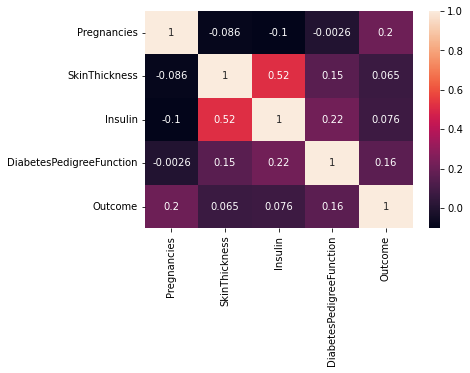

In [101]:
corr = data.corr()
sns.heatmap(corr, annot=True)

# training testing

In [111]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [177]:
# X
# y

### Logistic Regression model is used here

In [135]:
scalar_features = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(scalar_features, y, test_size = 0.3, random_state = 0)
model = LogisticRegression().fit(X_train,y_train)

In [136]:
y_pred = model.predict(X_test)

In [137]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [138]:
y_pred_probability = model.predict_proba(X_test)

In [ ]:
ypred = model.predict(X_test)
print(ypred)
ypred_lis = []
for i in ypred:
    if i>0.45:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

In [139]:
y_pred_probability

array([[0.67548418, 0.32451582],
       [0.6679935 , 0.3320065 ],
       [0.70047311, 0.29952689],
       [0.54628441, 0.45371559],
       [0.73353103, 0.26646897],
       [0.7540426 , 0.2459574 ],
       [0.31357029, 0.68642971],
       [0.42687616, 0.57312384],
       [0.67633958, 0.32366042],
       [0.55737684, 0.44262316],
       [0.4743946 , 0.5256054 ],
       [0.39374224, 0.60625776],
       [0.58065199, 0.41934801],
       [0.67378559, 0.32621441],
       [0.47753667, 0.52246333],
       [0.66138234, 0.33861766],
       [0.37451463, 0.62548537],
       [0.78070954, 0.21929046],
       [0.62524331, 0.37475669],
       [0.56664403, 0.43335597],
       [0.58582776, 0.41417224],
       [0.67665409, 0.32334591],
       [0.6034302 , 0.3965698 ],
       [0.70306951, 0.29693049],
       [0.69828892, 0.30171108],
       [0.67854204, 0.32145796],
       [0.75069476, 0.24930524],
       [0.37664987, 0.62335013],
       [0.72423896, 0.27576104],
       [0.69958088, 0.30041912],
       [0.

In [182]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[144  13]
 [ 50  24]]
0.43243243243243246
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.65      0.32      0.43        74

    accuracy                           0.73       231
   macro avg       0.70      0.62      0.63       231
weighted avg       0.71      0.73      0.70       231



### KNN is used here as another model for training testing purpose

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


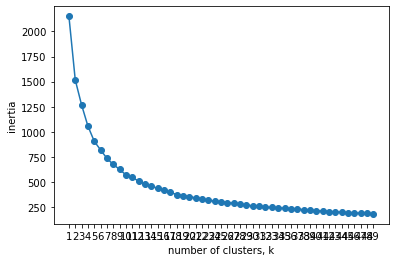

In [188]:
# Running KMeans models to create chart for elbow method

from sklearn.cluster import KMeans
ks = range(1, 50)    # varying cluster values from 1 to 10
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train,y_train)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias, to apply elbow method
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [193]:
# k25
df_range = range(1,100)
for k in df_range:
    kNNm = KNeighborsClassifier(n_neighbors=k)
    kNNm.fit(X_train,y_train)
    knn_pred = kNNm.predict(X_test)
    knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred)*100, 2)
    cm = confusion_matrix(y_test, knn_pred)
    print (cm)
    print(f1_score(y_test, knn_pred))
    print(classification_report(y_test,knn_pred))

[[134  23]
 [ 47  27]]
0.43548387096774194
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       157
           1       0.54      0.36      0.44        74

    accuracy                           0.70       231
   macro avg       0.64      0.61      0.61       231
weighted avg       0.68      0.70      0.68       231



In [194]:
kNNm = KNeighborsClassifier(n_neighbors=11)
kNNm.fit(X_train,y_train)
knn_pred = kNNm.predict(X_test)
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred)*100, 2)
cm = confusion_matrix(y_test, knn_pred)
print (cm)
print(f1_score(y_test, knn_pred))
print(classification_report(y_test,knn_pred))

[[134  23]
 [ 47  27]]
0.43548387096774194
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       157
           1       0.54      0.36      0.44        74

    accuracy                           0.70       231
   macro avg       0.64      0.61      0.61       231
weighted avg       0.68      0.70      0.68       231



In [195]:
mean_squared_error(y_test, y_pred) 

0.2727272727272727

# keras

In [197]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sb

In [198]:
print(X_train.shape)
print(X_test.shape)

(537, 4)
(231, 4)


In [199]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(4,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [200]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=31)

Epoch 1/31
17/17 [==============================] - 2s 3ms/step - loss: 0.7574 - accuracy: 0.4339
Epoch 2/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5549
Epoch 3/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6127
Epoch 4/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6555
Epoch 5/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.6462
Epoch 6/31
17/17 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6592
Epoch 7/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6574
Epoch 8/31
17/17 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.6629
Epoch 9/31
17/17 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.6704
Epoch 10/31
17/17 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6723
Epoch 11/31
17/17 [

In [202]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7143


[0.5792137384414673, 0.7142857313156128]

In [203]:
ypred = model.predict(X_test)
print(ypred)
ypred_lis = []
for i in ypred:
    if i>0.45:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

8/8 [==============================] - 0s 2ms/step
[[0.33797228]
 [0.3787188 ]
 [0.35419226]
 [0.48389748]
 [0.2290961 ]
 [0.22031744]
 [0.6870554 ]
 [0.4639047 ]
 [0.3370672 ]
 [0.46398148]
 [0.55567443]
 [0.5016068 ]
 [0.39720315]
 [0.3791832 ]
 [0.6252311 ]
 [0.26601306]
 [0.6967948 ]
 [0.19721106]
 [0.37199262]
 [0.47376516]
 [0.45864344]
 [0.30185974]
 [0.35524556]
 [0.23937705]
 [0.3541988 ]
 [0.31256667]
 [0.23121925]
 [0.59130836]
 [0.23919034]
 [0.35119992]
 [0.52267605]
 [0.4116529 ]
 [0.26607528]
 [0.50255376]
 [0.22197077]
 [0.27887088]
 [0.4004913 ]
 [0.28498706]
 [0.3477372 ]
 [0.2987528 ]
 [0.26366937]
 [0.33755198]
 [0.45477012]
 [0.2390757 ]
 [0.28319702]
 [0.2454405 ]
 [0.21109216]
 [0.32047457]
 [0.6179906 ]
 [0.355912  ]
 [0.43765047]
 [0.2855285 ]
 [0.80237687]
 [0.54754114]
 [0.42881784]
 [0.1641703 ]
 [0.24351035]
 [0.3137557 ]
 [0.3095192 ]
 [0.4472568 ]
 [0.4378642 ]
 [0.3782478 ]
 [0.17262004]
 [0.21611623]
 [0.31685004]
 [0.5889945 ]
 [0.4455649 ]
 [0.2844957

In [204]:
data = {'orignal':y_test, 'predicted':ypred_lis}
df_check = pd.DataFrame(data)
df_check

,orignal,predicted
661,1,0
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
165,1,1
188,1,1
334,0,0
758,0,0


              precision    recall  f1-score   support

           0       0.74      0.85      0.80       157
           1       0.55      0.38      0.45        74

    accuracy                           0.70       231
   macro avg       0.65      0.62      0.62       231
weighted avg       0.68      0.70      0.68       231



Text(69.0, 0.5, 'True_number')

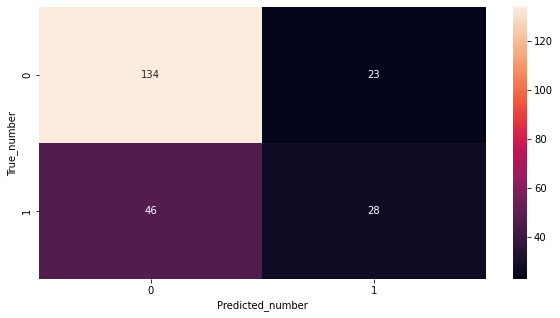

In [205]:
print(classification_report(y_test,ypred_lis))
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=ypred_lis)
plt.figure(figsize = (10,5))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')